# 0 - 데이터 준비하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Auction_master_train.csv') 


# '아파트 경매가격 예측 모델링 대회' 데이터 불러오기

In [3]:
df.isnull().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [4]:
del df['road_bunji2']
del df['road_bunji1']
del df['Specific']
del df['Close_result']
del df['addr_bunji2']
del df['Close_date']
del df['Preserve_regist_date']
del df['addr_bunji1']
del df['addr_li']
del df['addr_etc']
del df['addr_san']
del df['addr_dong']
del df['addr_si']
del df['Appraisal_date']
del df['First_auction_date']
del df['Final_auction_date']
del df['road_name']
del df['Creditor']
del df['Appraisal_company']

In [5]:
df.isnull().sum()

Auction_key                    0
Auction_class                  0
Bid_class                      0
Claim_price                    0
Auction_count                  0
Auction_miscarriage_count      0
Total_land_gross_area          0
Total_land_real_area           0
Total_land_auction_area        0
Total_building_area            0
Total_building_auction_area    0
Total_appraisal_price          0
Minimum_sales_price            0
Final_result                   0
addr_do                        0
Apartment_usage                0
Total_floor                    0
Current_floor                  0
Share_auction_YorN             0
point.y                        0
point.x                        0
Hammer_price                   0
dtype: int64

In [6]:
df.describe() #데이터의 요약 통계 확인

,Auction_key,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Total_floor,Current_floor,point.y,point.x,Hammer_price
count,1933.000000,1.933000e+03,1933.000000,1933.000000,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03,1.933000e+03,1933.000000,1933.000000,1933.000000,1933.000000,1.933000e+03
mean,1380.271081,3.703908e+08,1.836006,0.788412,3.458714e+04,42.333802,41.310776,96.417693,94.148810,4.973592e+08,4.155955e+08,16.980859,8.817900,36.698018,127.731667,4.726901e+08
std,801.670470,1.337869e+09,0.938319,0.831715,9.442101e+04,65.274404,65.385900,106.323240,106.845985,7.873851e+08,5.030312e+08,9.509021,8.044644,1.150269,0.993055,5.574493e+08
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,9.390000,1.500000,4.285000e+06,4.285000e+06,3.000000,0.000000,35.051385,126.809393,6.303000e+06
25%,691.000000,7.746112e+07,1.000000,0.000000,2.997000e+03,25.870000,24.570000,61.520000,59.970000,2.090000e+08,1.750000e+08,12.000000,3.000000,35.188590,126.959167,1.975550e+08
50%,1395.000000,1.728143e+08,2.000000,1.000000,1.424140e+04,37.510000,36.790000,84.900000,84.860000,3.600000e+08,3.120000e+08,15.000000,7.000000,37.500862,127.065003,3.544500e+08
75%,2062.000000,3.565089e+08,2.000000,1.000000,4.140310e+04,51.790000,51.320000,114.940000,114.850000,5.720000e+08,4.864000e+08,21.000000,12.000000,37.566116,129.018054,5.599000e+08
max,2762.000000,2.286481e+10,13.000000,9.000000,3.511936e+06,2665.840000,2665.840000,4255.070000,4255.070000,2.777500e+10,1.422080e+10,80.000000,65.000000,37.685575,129.255872,1.515100e+10


In [7]:
df.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,...,Minimum_sales_price,Final_result,addr_do,Apartment_usage,Total_floor,Current_floor,Share_auction_YorN,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,2,1,12592.0,37.35,37.35,181.77,...,668800000,낙찰,부산,주상복합,45,5,N,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,2,1,42478.1,18.76,18.76,118.38,...,858400000,낙찰,부산,아파트,70,51,N,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,3,2,149683.1,71.00,71.00,49.94,...,76160000,낙찰,부산,아파트,15,14,N,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,2,1,24405.0,32.98,32.98,84.91,...,230720000,낙찰,부산,아파트,20,11,N,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,2,1,774.0,45.18,45.18,84.96,...,136000000,낙찰,부산,아파트,7,7,N,35.099630,128.998874,158660000


# 1 -  EDA 및 전처리 인코딩 (3개씩)

In [8]:
df.Apartment_usage.replace({'아파트':0, '주상복합':1},inplace=True)

In [9]:
df.Auction_class.replace({'임의':0, '강제':1},inplace=True)

In [10]:
df.Bid_class.replace({'개별':0,'일괄':0, '일반':1},inplace=True)

In [11]:
df.Final_result.replace({'낙찰':1},inplace=True)

In [12]:
df.addr_do.replace({'부산':0, '서울':1},inplace=True)

In [13]:
df.Share_auction_YorN.replace({'Y':0, 'N':1},inplace=True)

In [14]:
df['Bid_class'].value_counts()

1    1796
0     137
Name: Bid_class, dtype: int64

# 2 - Target 변수로 선형회귀 분석

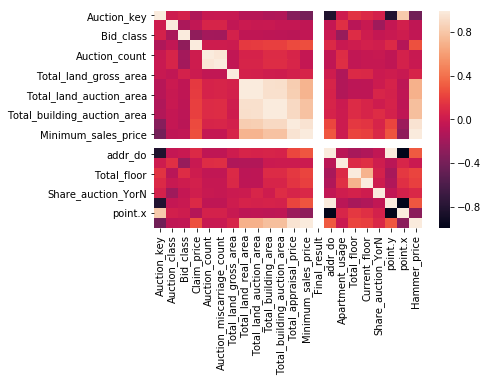

In [15]:
sns.heatmap(df.corr())
plt.show()

In [16]:
df[['Minimum_sales_price','Hammer_price']]

,Minimum_sales_price,Hammer_price
0,668800000,760000000
1,858400000,971889999
2,76160000,93399999
3,230720000,256899000
4,136000000,158660000
5,177600000,206989000
6,120320000,135500000
7,533600000,640299999
8,75200000,77380000
9,130400000,177070000


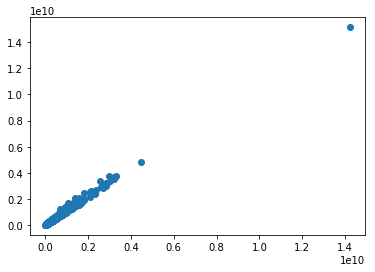

In [17]:
plt.scatter(x=df['Minimum_sales_price'],y=df['Hammer_price'])
plt.show()

# 3 - 데이터의 행렬 통해서 값 비교

In [18]:
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:-1] # X데이터 분리
y = df.iloc[:,-1] # y데이터 분리

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

#모델 불러옴
model = LinearRegression()
#train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
model.score(X_train, y_train) #r-square

0.9909321787699049

In [24]:
y_pred = model.predict(X_test)

In [25]:
#MSE
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

3013227529654440.0

In [26]:
print(model.coef_) #추정된 회귀계수(intercept제외) 베타들
print(model.intercept_) #intercept 베타0

[-6.41568552e+06  5.70394464e+05  1.60004135e+06  5.21068505e+06
 -2.09388606e+07  3.27452927e+07  2.19377957e+06  3.08236064e+07
 -4.49710735e+07 -1.52818283e+07  9.29461852e+05  3.16979941e+07
  5.40611013e+08 -2.01165676e-07  7.89299982e+07 -5.92530870e+06
  2.19952797e+06 -2.32185048e+06  5.47418368e+06 -4.00550145e+07
  3.96431270e+07]
472711504.6865425


In [27]:
model.predict(X_test)

array([7.34429151e+08, 6.69325777e+08, 2.74814418e+08, 4.78639833e+08,
       5.65915902e+07, 3.39741821e+09, 7.10900402e+08, 1.00127064e+09,
       9.38157552e+08, 8.95824446e+08, 1.03385517e+08, 3.50431509e+08,
       1.02369119e+09, 7.19313480e+08, 3.94143050e+08, 1.83536432e+08,
       5.02933142e+08, 4.88147001e+08, 1.99081406e+08, 5.90396518e+08,
       6.85190780e+08, 8.46235502e+08, 9.76889970e+07, 6.16673977e+08,
       1.74381098e+08, 6.17292937e+08, 9.29866891e+08, 7.92111200e+08,
       2.05091373e+08, 4.14127538e+08, 9.27870369e+07, 1.57108904e+09,
       6.31735134e+08, 9.35752307e+08, 3.11307521e+08, 4.63066310e+08,
       8.86274302e+08, 9.19871212e+07, 4.62135071e+08, 1.78032106e+08,
       1.07638890e+09, 3.87135705e+08, 3.64937018e+08, 7.58869884e+08,
       3.97535780e+08, 7.60190828e+07, 1.86133634e+08, 4.58803690e+08,
       3.51052445e+08, 2.46508512e+08, 3.11363862e+08, 5.48665129e+08,
       5.15166003e+08, 1.04367275e+09, 3.99026995e+08, 2.22010149e+08,
      

In [28]:
model.score(X_test,y_test) #큰 차이가 없음 (오버피팅이 안되고, 설명력이 높음을 알 수 있다.)

0.9894455389866044

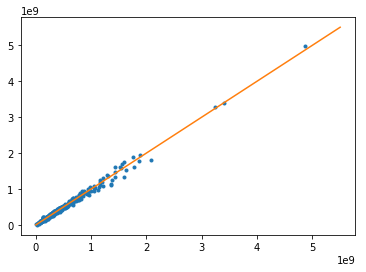

In [29]:
# 예측 vs. 실제데이터 plot
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0,1/2*(1e9+1e10))
y = x
plt.plot(x, y)
plt.show()

In [30]:
#Ridge, Lasso 회귀
from sklearn.linear_model import Ridge, Lasso

ridge=Ridge(alpha=1.0)#alpha: 얼마나 정규화를 할건지 정하는 양수 하이퍼파라미터 (클수록 더 정규화)
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [31]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>

In [32]:
#R-square
ridge.score(X_train,y_train)

0.9909172733005008

In [33]:
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
ridge.score(X_train,y_train)

0.9909300062712626

In [34]:
#Lasso
lasso=Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.9909301402055547

beta, mse 구하기

In [49]:
from numpy.linalg import inv 

def estimate_beta(x,y):
    x2 = np.transpose(x) # x' 구하기
    x3 = np.dot(x,x2)  #x'x 구하기
    x2y = np.dot(x2,y) #x'y 구하기
    
    x4 = np.linalg.inv(x3) #역행렬 구하기 위해서 inverse 사용 (X'X)-1
    beta_hat = np.dot(x4,x2y) #베타헷 = (X'X)-1X'Y
    
    return beta_hat

In [50]:
x = X_train
y = y_train

In [51]:
#x행렬에 intercept를 추가해야함
estimate_beta(x,y)

ValueError: shapes (1546,1546) and (21,) not aligned: 1546 (dim 1) != 21 (dim 0)

In [54]:
import sklearn as sk
sk.metrics.mean_squared_error(y_train, model.predict(X_train))

3013227529654440.0

In [55]:
def mean_squared_error(y, t):
    return ((y-t)**2).mean(axis=None)

In [56]:
mean_squared_error(y_train, model.predict(X_train))

3013227529654443.5